<a href="https://colab.research.google.com/github/nagarjuna741621/digital-image-processing/blob/main/lab2_AP23110011370.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

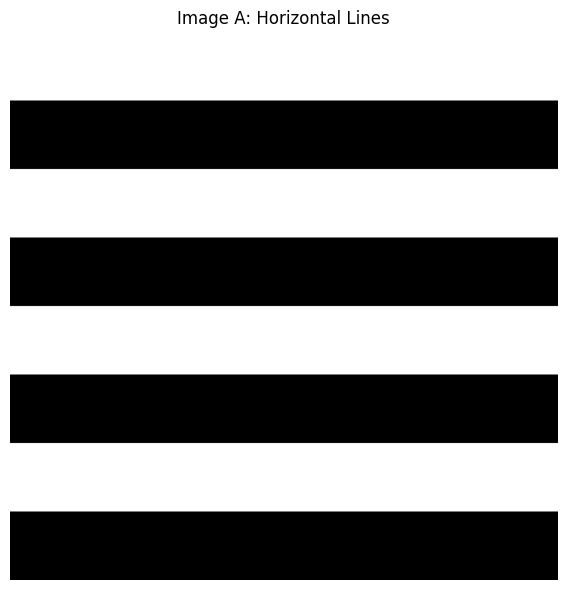

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Image dimensions and line size
width = 1024
height = 1024
line_size = 128

# --- Image A: Alternating Horizontal Lines ---
# Create a black image (0 for black)
image_a = np.zeros((height, width), dtype=np.uint8)

# Calculate the number of horizontal lines
num_h_lines = height // line_size

# Iterate and create alternating black and white horizontal lines
for i in range(num_h_lines):
    start_row = i * line_size
    end_row = start_row + line_size
    # If the line index is even, make it white (255)
    if i % 2 == 0:
        image_a[start_row:end_row, :] = 255

# --- Display Image A ---
plt.figure(figsize=(6, 6))
plt.imshow(image_a, cmap='gray')
plt.title('Image A: Horizontal Lines')
plt.axis('off')
plt.tight_layout()
plt.show()

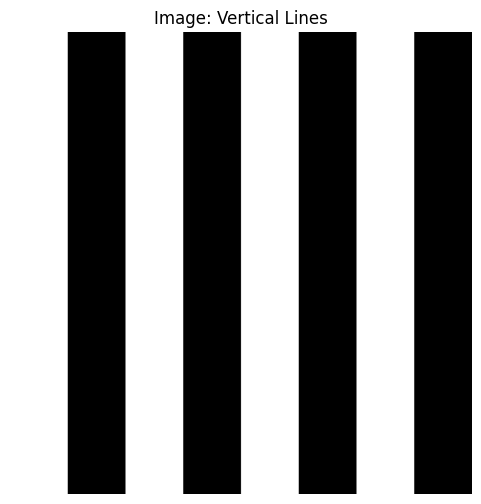

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Image dimensions and line size
width = 1024
height = 1024
line_size = 128

# --- Image with Alternating Vertical Lines ---
# Create a black image (0 for black)
image_vertical = np.zeros((height, width), dtype=np.uint8)

# Calculate the number of vertical lines
num_v_lines = width // line_size

# Iterate and create alternating black and white vertical lines
for i in range(num_v_lines):
    start_col = i * line_size
    end_col = start_col + line_size
    # If the line index is even, make it white (255)
    if i % 2 == 0:
        image_vertical[:, start_col:end_col] = 255

# --- Display Image ---
plt.figure(figsize=(6, 6))
plt.imshow(image_vertical, cmap='gray')
plt.title('Image: Vertical Lines')
plt.axis('off')
plt.show()

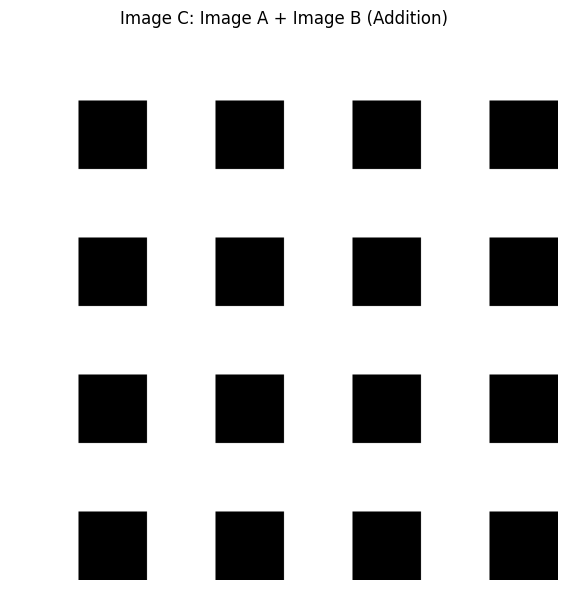

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Image A (horizontal lines) and Image B (vertical lines) are already in the kernel state.
# Assuming image_a and image_b are available from previous executions.
# If not, the original generation code would need to be run first.

# Perform image addition
# Since both images have pixel values 0 or 255, a direct addition might exceed 255.
# We can cast to a larger integer type, add, and then clip the values to 255, then cast back to uint8.
# Alternatively, for binary images, np.maximum or logical_or can represent a union of white areas.
# Let's perform a direct addition and clip to simulate a standard image addition.
image_c = np.add(image_a, image_b, dtype=np.uint16) # Add as uint16 to prevent overflow during sum
image_c = np.clip(image_c, 0, 255).astype(np.uint8)

# Display the resulting image
plt.figure(figsize=(6, 6))
plt.imshow(image_c, cmap='gray')
plt.title('Image C: Image A + Image B (Addition)')
plt.axis('off')
plt.tight_layout()
plt.show()

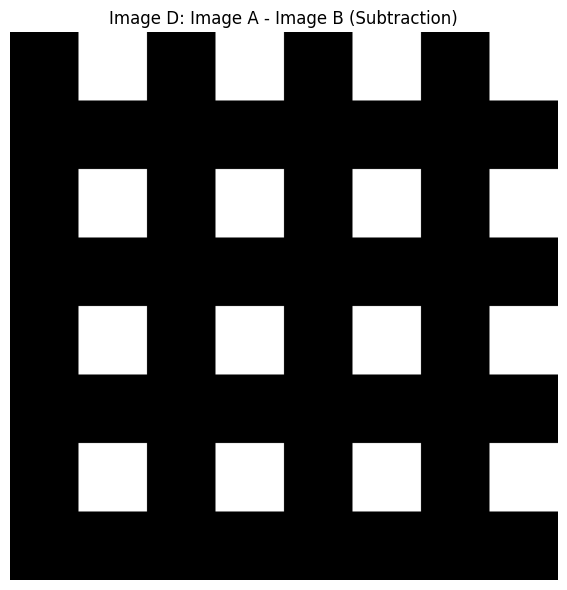

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Image A (horizontal lines) and Image B (vertical lines) are assumed to be in the kernel state.

# Perform image subtraction
# Since pixel values are 0 or 255, subtraction might result in negative values or values above 255.
# We will perform the subtraction and then clip values to the valid range [0, 255].
# Using np.int16 for intermediate calculation to handle negative numbers before clipping.
image_d = np.subtract(image_a, image_b, dtype=np.int16)
image_d = np.clip(image_d, 0, 255).astype(np.uint8)

# Display the resulting image
plt.figure(figsize=(6, 6))
plt.imshow(image_d, cmap='gray')
plt.title('Image D: Image A - Image B (Subtraction)')
plt.axis('off')
plt.tight_layout()
plt.show()

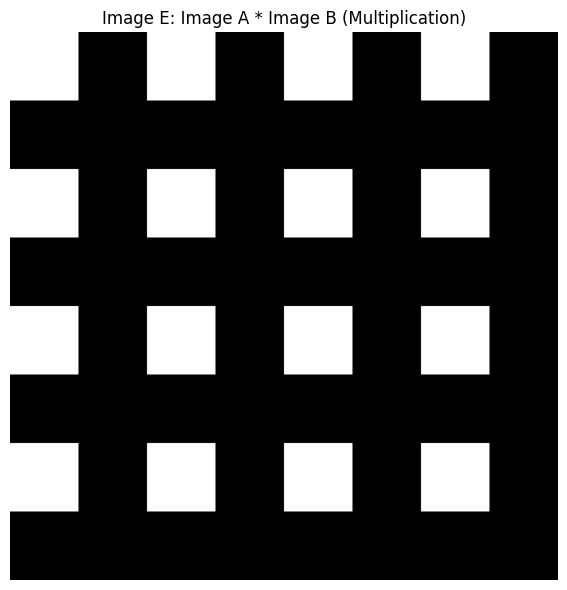

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Image A (horizontal lines) and Image B (vertical lines) are assumed to be in the kernel state.

# Perform image multiplication
# Since pixel values are 0 or 255, the product will also be 0 or 255*255.
# We can perform the multiplication and then clip values to the valid range [0, 255].
# For binary images, this effectively acts like a logical AND operation.
image_e = np.multiply(image_a, image_b, dtype=np.uint16) # Multiply as uint16 to prevent overflow
image_e = np.clip(image_e, 0, 255).astype(np.uint8) # Clip and cast back to uint8

# Display the resulting image
plt.figure(figsize=(6, 6))
plt.imshow(image_e, cmap='gray')
plt.title('Image E: Image A * Image B (Multiplication)')
plt.axis('off')
plt.tight_layout()
plt.show()

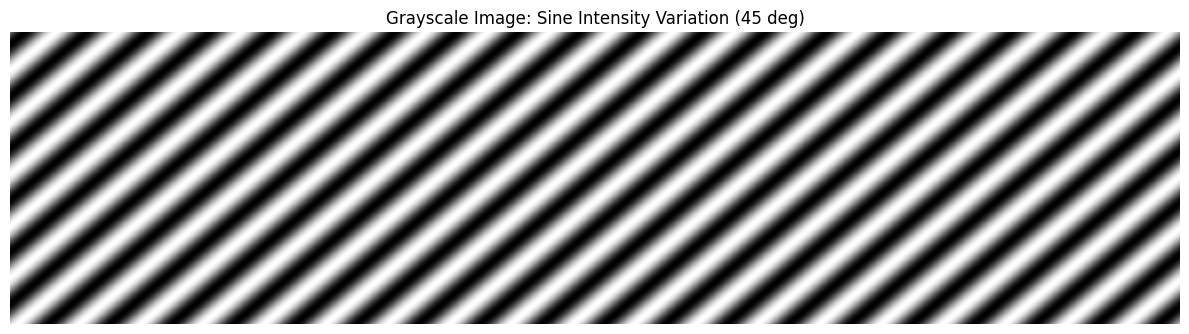

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Image dimensions
height = 256
width = 1024 # Decreased width
# Angle for the wave in radians
angle_rad = np.deg2rad(-130)
# Create a coordinate grid for the entire image
y_coords, x_coords = np.indices((height, width)).astype(float)
# Define a spatial frequency for the waves.
# This determines how many cycles appear across the image diagonally.
# Adjust this value to change the density of the waves.
# Here, we'll aim for about 4 cycles across the width dimension (similar to previous 1D waves).
# The effective 'length' for the diagonal wave can be roughly max(width, height).
# Let's make k such that 'k * max_dim' results in a few cycles (e.g., 4 * 2*pi)
frequency_scale_factor = 59 * np.pi / width # Increased frequency for more lines
# Calculate the rotated coordinate component that the wave will vary along
# x' = x * cos(theta) + y * sin(theta)
rotated_coord = x_coords * np.cos(angle_rad) + y_coords * np.sin(angle_rad)
# --- Grayscale Image with Sine Intensity Variation at 45 degrees ---
intensity_sine_rotated = (np.sin(rotated_coord * frequency_scale_factor) + 1) / 2 # Scale from [0, 1]
image_sinusoidal_sine_rotated = (intensity_sine_rotated * 255).astype(np.uint8)
# --- Display Images ---
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.imshow(image_sinusoidal_sine_rotated, cmap='gray')
plt.title('Grayscale Image: Sine Intensity Variation (45 deg)')
plt.axis('off')
plt.tight_layout()
plt.show()

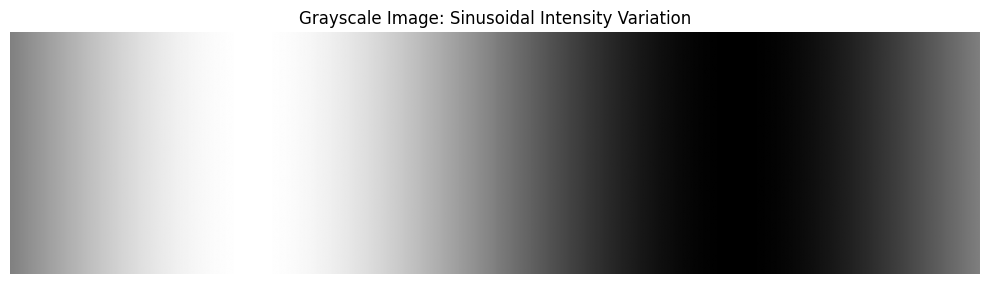

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Image dimensions
height = 256
width = 1024

# --- Grayscale Image with Sinusoidal Intensity Variation ---
# Create a 1D array representing the intensity variation across the width
x_sin = np.linspace(0, 2 * np.pi, width)
sinusoidal_intensity = (np.sin(x_sin) + 1) / 2 # Scale from [0, 1]
image_sinusoidal = (sinusoidal_intensity * 255).astype(np.uint8)

# Replicate the 1D intensity pattern across all rows to create the 2D image
image_sinusoidal = np.tile(image_sinusoidal, (height, 1))

# --- Display Image ---
plt.figure(figsize=(10, 5))
plt.imshow(image_sinusoidal, cmap='gray')
plt.title('Grayscale Image: Sinusoidal Intensity Variation')
plt.axis('off')
plt.tight_layout()
plt.show()

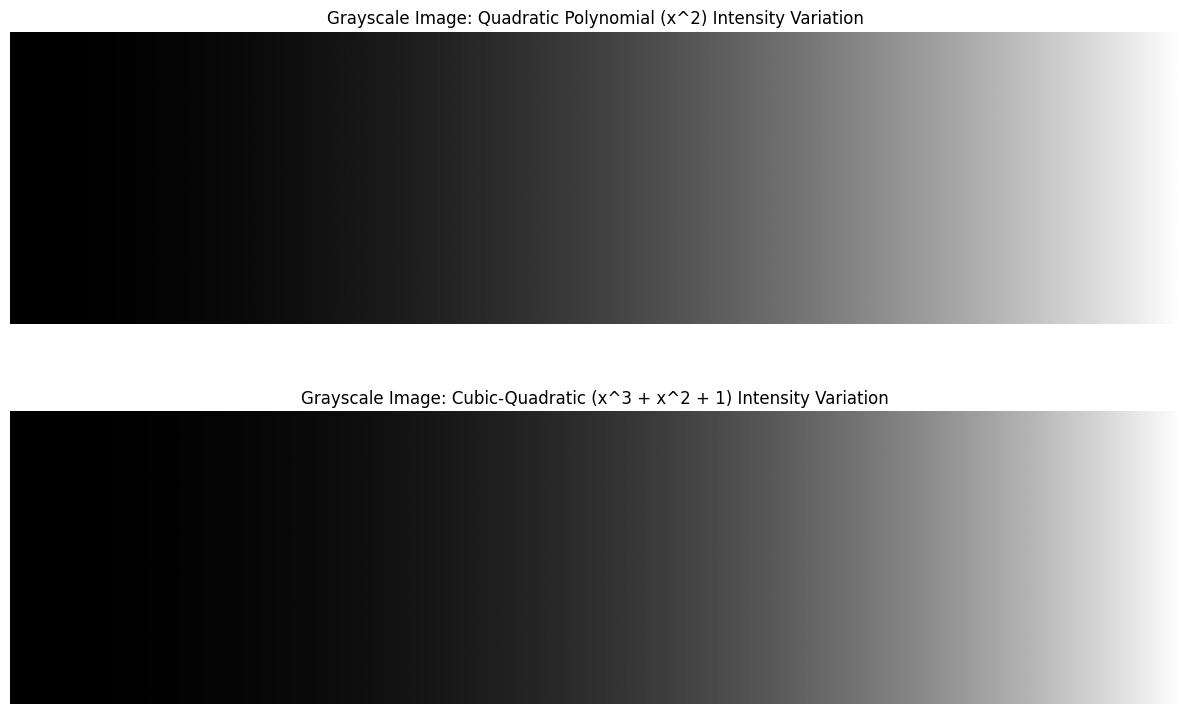

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Image dimensions
height = 256
width = 1024

# --- Grayscale Image with Quadratic Polynomial Intensity Variation (x^2) ---
# This will represent the shape of x^2+3 after normalization for x in [0,1]
x_poly = np.linspace(0, 1, width)
polynomial_intensity_quadratic = x_poly**2 # Use x^2 for variation

# Scale from [0, 1] and convert to uint8
image_polynomial_quadratic = (polynomial_intensity_quadratic * 255).astype(np.uint8)

# Replicate the 1D intensity pattern across all rows to create the 2D image
image_polynomial_quadratic = np.tile(image_polynomial_quadratic, (height, 1))

# --- Grayscale Image with Cubic-Quadratic Polynomial Intensity Variation (x^3 + x^2 + 1) ---
# Calculate the function values
func_values = x_poly**3 + x_poly**2 + 1

# Normalize the function values to the range [0, 1] for proper scaling
min_val = np.min(func_values)
max_val = np.max(func_values)
polynomial_intensity_cubic_quadratic = (func_values - min_val) / (max_val - min_val)

# Scale from [0, 1] and convert to uint8
image_polynomial_cubic_quadratic = (polynomial_intensity_cubic_quadratic * 255).astype(np.uint8)

# Replicate the 1D intensity pattern across all rows to create the 2D image
image_polynomial_cubic_quadratic = np.tile(image_polynomial_cubic_quadratic, (height, 1))

# --- Display Images ---
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.imshow(image_polynomial_quadratic, cmap='gray')
plt.title('Grayscale Image: Quadratic Polynomial (x^2) Intensity Variation')
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(image_polynomial_cubic_quadratic, cmap='gray')
plt.title('Grayscale Image: Cubic-Quadratic (x^3 + x^2 + 1) Intensity Variation')
plt.axis('off')

plt.tight_layout()
plt.show()

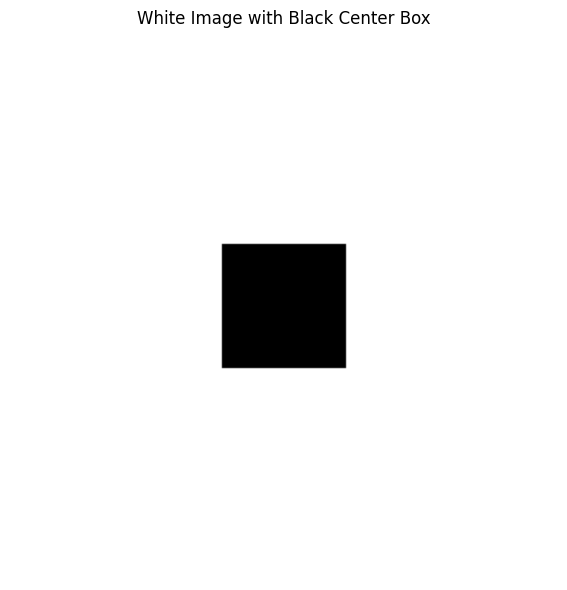

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Image dimensions
image_size = 256
box_size = 58

# Create a white image (255 for white)
image_white_box = 255 * np.ones((image_size, image_size), dtype=np.uint8)

# Calculate the coordinates for the black box center
center_x, center_y = image_size // 2, image_size // 2

# Calculate the top-left and bottom-right corners of the black box
half_box = box_size // 2
start_x = center_x - half_box
end_x = center_x + half_box
start_y = center_y - half_box
end_y = center_y + half_box

# Ensure the box is exactly 58x58 even if image_size is odd/even
# Adjust for potential off-by-one if box_size is odd
if box_size % 2 != 0:
    end_x += 1
    end_y += 1

# Set the pixels within the box to black (0)
image_white_box[start_y:end_y, start_x:end_x] = 0

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(image_white_box, cmap='gray')
plt.title('White Image with Black Center Box')
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Image size
N = 512

def create_binary_image(size):
    """Creates a blank black binary image."""
    return np.zeros((size, size), dtype=np.uint8)

def draw_curve_centered(image, x_coords, y_coords, color=255, line_width=1):
    """Draws a curve on the image, scaling and centering it appropriately.
       Handles potential clipping and line thickness."""

    # Calculate bounding box of the curve
    min_x, max_x = np.min(x_coords), np.max(x_coords)
    min_y, max_y = np.min(y_coords), np.max(y_coords)

    range_x = max_x - min_x
    range_y = max_y - min_y

    # Calculate scaling factor to fit within N-padding, maintaining aspect ratio
    padding = 20 # Pixels padding from edges
    target_dim = N - 2 * padding

    scale = 1.0
    if range_x > 0 and range_y > 0:
        scale = min(target_dim / range_x, target_dim / range_y)
    elif range_x > 0:
        scale = target_dim / range_x
    elif range_y > 0:
        scale = target_dim / range_y

    # Apply scaling and recenter
    x_centered = x_coords - (min_x + max_x) / 2
    y_centered = y_coords - (min_y + max_y) / 2

    x_pixel = (x_centered * scale + N / 2).astype(int)
    y_pixel = (y_centered * scale + N / 2).astype(int)

    # Clip coordinates to ensure they are within image bounds
    x_pixel = np.clip(x_pixel, 0, N - 1)
    y_pixel = np.clip(y_pixel, 0, N - 1)

    # Draw points on the image
    for px, py in zip(x_pixel, y_pixel):
        # Draw the main point
        image[py, px] = color
        # For thicker lines, draw neighbors (simple approximation)
        if line_width > 1:
            for i in range(-(line_width // 2), (line_width // 2) + 1):
                for j in range(-(line_width // 2), (line_width // 2) + 1):
                    nx, ny = px + i, py + j
                    if 0 <= nx < N and 0 <= ny < N:
                        image[ny, nx] = color
    return image

print(f"Setup complete. Image size set to {N}x{N}.")

Setup complete. Image size set to 512x512.


### Logarithmic Spiral

A logarithmic spiral is a self-similar spiral curve that often appears in nature. Its parametric equations are given by:

$x(t) = a \cdot e^{b \cdot t} \cdot \cos(t)$
$y(t) = a \cdot e^{b \cdot t} \cdot \sin(t)$

Where:
- $t$ is the angle (from 0 to multiple $\pi$ radians).
- $a$ is a scaling factor.
- $b$ determines how tightly the spiral winds.

We will generate two spirals with different numbers of samples ($t$ values) to observe the effect of sampling resolution.

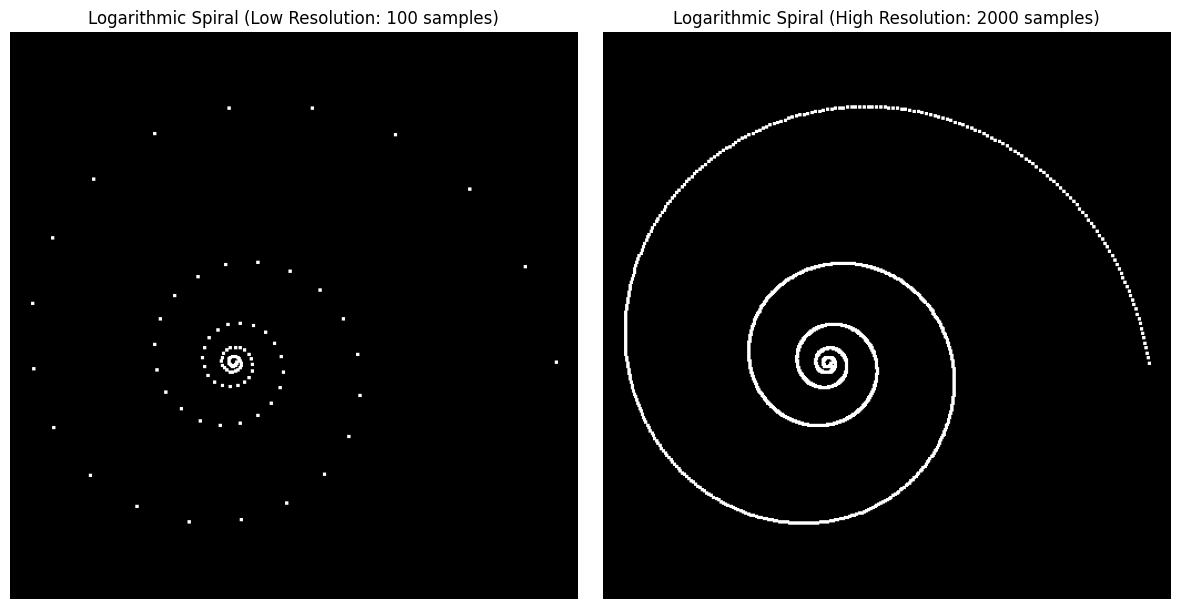

In [ ]:
# Parameters for the logarithmic spiral
a = 0.5
b = 0.15
t_range = np.linspace(0, 10 * np.pi, 1000) # Full range for curve generation

# --- Low Sampling Resolution ---
num_samples_low = 100 # Fewer points
t_low = np.linspace(0, 10 * np.pi, num_samples_low)
x_low = a * np.exp(b * t_low) * np.cos(t_low)
y_low = a * np.exp(b * t_low) * np.sin(t_low)

image_log_spiral_low = create_binary_image(N)
image_log_spiral_low = draw_curve_centered(image_log_spiral_low, x_low, y_low, line_width=2)

# --- High Sampling Resolution ---
num_samples_high = 2000 # More points
t_high = np.linspace(0, 10 * np.pi, num_samples_high)
x_high = a * np.exp(b * t_high) * np.cos(t_high)
y_high = a * np.exp(b * t_high) * np.sin(t_high)

image_log_spiral_high = create_binary_image(N)
image_log_spiral_high = draw_curve_centered(image_log_spiral_high, x_high, y_high, line_width=2)

# --- Display Results ---
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_log_spiral_low, cmap='gray')
plt.title(f'Logarithmic Spiral (Low Resolution: {num_samples_low} samples)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_log_spiral_high, cmap='gray')
plt.title(f'Logarithmic Spiral (High Resolution: {num_samples_high} samples)')
plt.axis('off')

plt.tight_layout()
plt.show()

### Helix-like Parametric Curve (2D Projection)

For a 2D 'helix-like' curve, we can create a spiral that also has radial oscillations, giving it a more complex, spring-like appearance when projected onto a 2D plane. The parametric equations we'll use are:

$r(t) = A \cdot t + B \cdot \sin(C \cdot t)$
$x(t) = r(t) \cdot \cos(t)$
$y(t) = r(t) \cdot \sin(t)$

Where:
- $t$ is the parameter controlling the curve's progression.
- $A$ controls the base rate of spiral expansion.
- $B$ controls the amplitude of the radial oscillation.
- $C$ controls the frequency of the radial oscillation.

Again, we will compare low and high sampling resolutions.

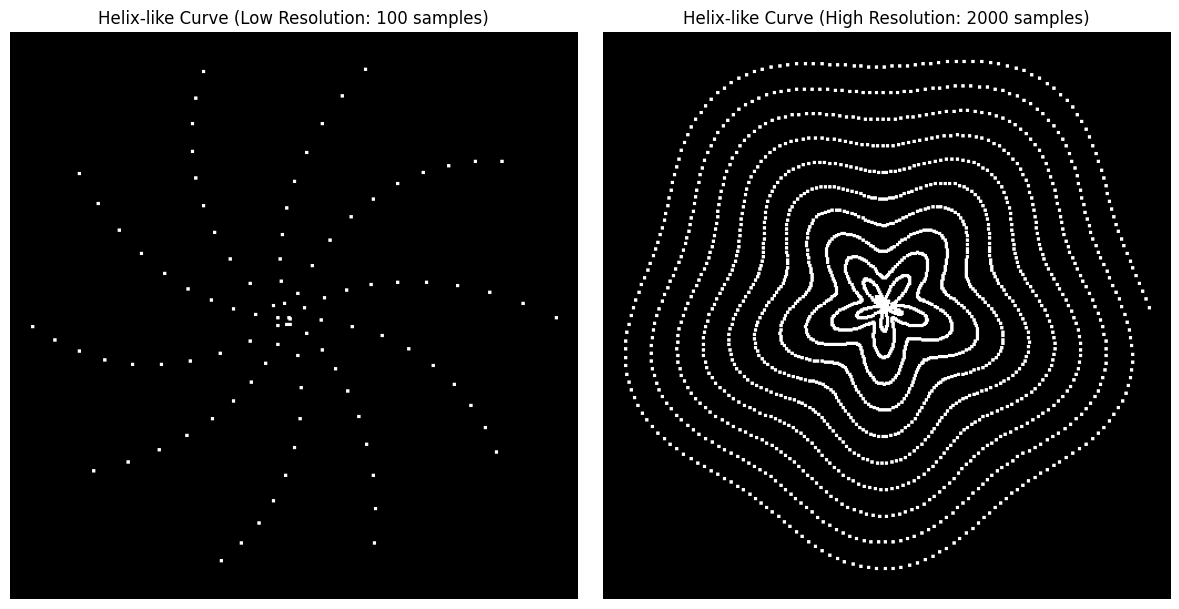

In [ ]:
# Parameters for the helix-like curve
A_helix = 5
B_helix = 20
C_helix = 5
t_helix_range = np.linspace(0, 20 * np.pi, 1000) # Full range for curve generation

# --- Low Sampling Resolution ---
num_samples_low_helix = 100
t_low_helix = np.linspace(0, 20 * np.pi, num_samples_low_helix)
r_low_helix = A_helix * t_low_helix + B_helix * np.sin(C_helix * t_low_helix)
x_low_helix = r_low_helix * np.cos(t_low_helix)
y_low_helix = r_low_helix * np.sin(t_low_helix)

image_helix_low = create_binary_image(N)
image_helix_low = draw_curve_centered(image_helix_low, x_low_helix, y_low_helix, line_width=2)

# --- High Sampling Resolution ---
num_samples_high_helix = 2000
t_high_helix = np.linspace(0, 20 * np.pi, num_samples_high_helix)
r_high_helix = A_helix * t_high_helix + B_helix * np.sin(C_helix * t_high_helix)
x_high_helix = r_high_helix * np.cos(t_high_helix)
y_high_helix = r_high_helix * np.sin(t_high_helix)

image_helix_high = create_binary_image(N)
image_helix_high = draw_curve_centered(image_helix_high, x_high_helix, y_high_helix, line_width=2)

# --- Display Results ---
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_helix_low, cmap='gray')
plt.title(f'Helix-like Curve (Low Resolution: {num_samples_low_helix} samples)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_helix_high, cmap='gray')
plt.title(f'Helix-like Curve (High Resolution: {num_samples_high_helix} samples)')
plt.axis('off')

plt.tight_layout()
plt.show()

### Analysis of Sampling Resolution on Curve Smoothness

As observed in the generated images:

- **Low Sampling Resolution:** When fewer samples (points) are used to generate the curve, the curve appears jagged, pixelated, or segmented. This is because the discrete points are far apart, and the drawing function connects them (or fills individual pixels) resulting in a stair-step effect, especially on diagonal or curved segments. The underlying continuous nature of the curve is poorly approximated.

- **High Sampling Resolution:** With a greater number of samples, the points along the curve are much closer together. This allows for a smoother approximation of the continuous curve. The transitions appear less abrupt, and the overall shape looks more fluid and accurate. This is because there are more pixels activated along the true path of the curve, creating a denser representation.

In essence, higher sampling resolution leads to a more accurate and visually smoother representation of a continuous parametric curve in a discrete pixel grid.

# New section

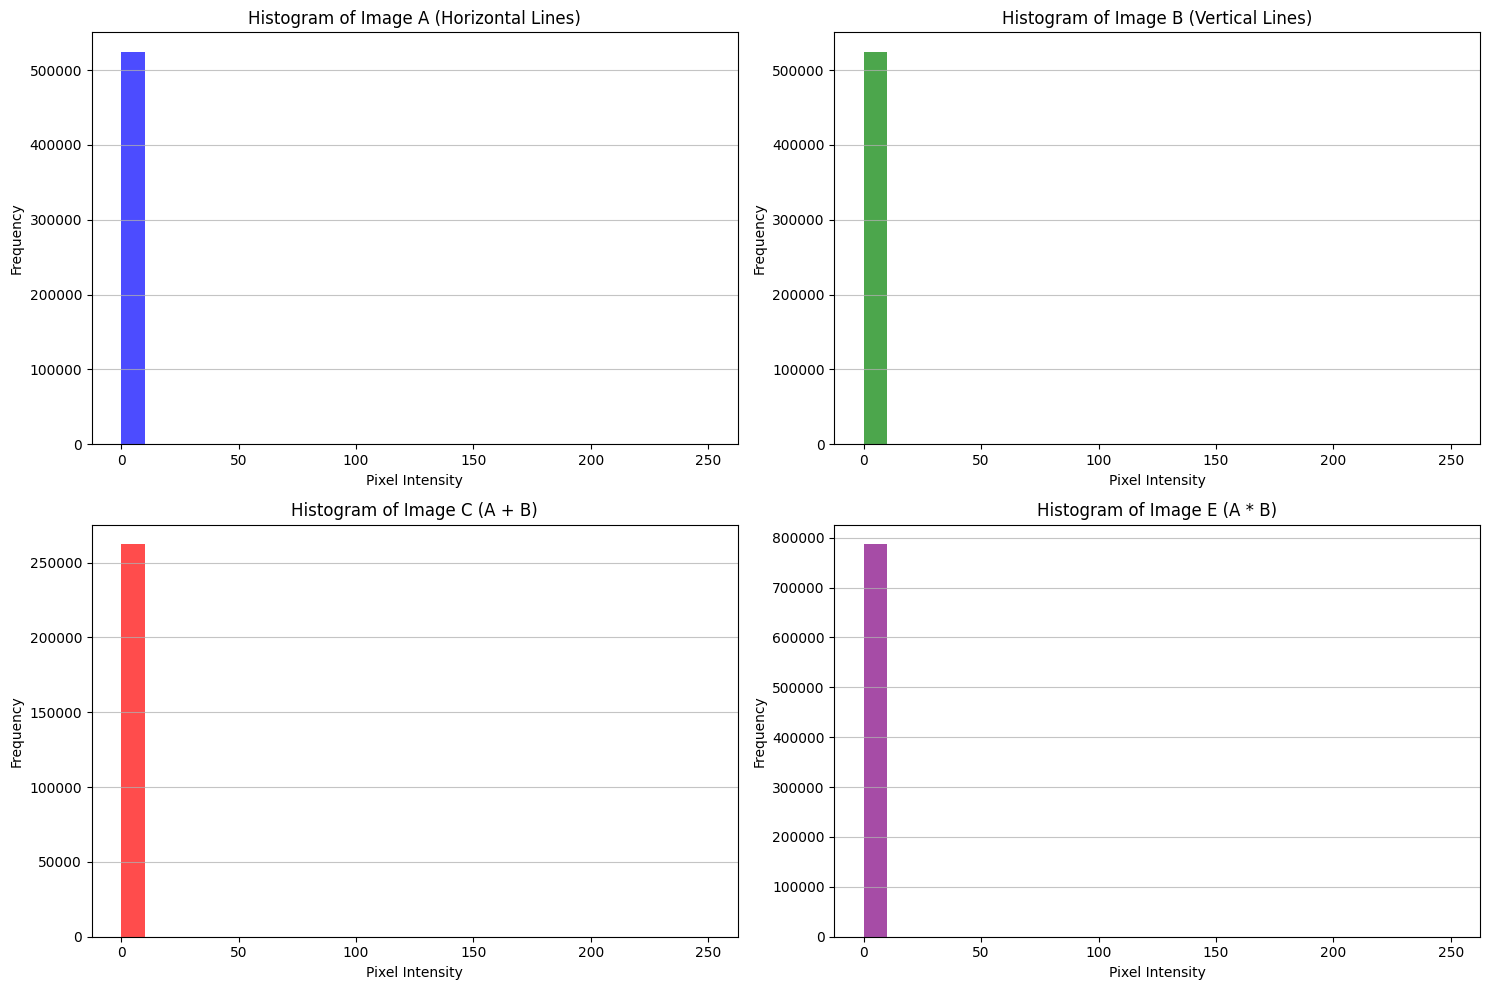

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming image_a, image_b, image_c, and image_e are available in the kernel state

# Create a figure to hold all histograms
plt.figure(figsize=(15, 10))

# Histogram for Image A
plt.subplot(2, 2, 1) # 2 rows, 2 columns, 1st subplot
plt.hist(image_a.ravel(), bins=np.arange(0, 257, 10), color='blue', alpha=0.7)
plt.title('Histogram of Image A (Horizontal Lines)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Histogram for Image B
plt.subplot(2, 2, 2) # 2 rows, 2 columns, 2nd subplot
plt.hist(image_b.ravel(), bins=np.arange(0, 257, 10), color='green', alpha=0.7)
plt.title('Histogram of Image B (Vertical Lines)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Histogram for Image C (A + B)
plt.subplot(2, 2, 3) # 2 rows, 2 columns, 3rd subplot
plt.hist(image_c.ravel(), bins=np.arange(0, 257, 10), color='red', alpha=0.7)
plt.title('Histogram of Image C (A + B)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Histogram for Image E (A * B)
plt.subplot(2, 2, 4) # 2 rows, 2 columns, 4th subplot
plt.hist(image_e.ravel(), bins=np.arange(0, 257, 10), color='purple', alpha=0.7)
plt.title('Histogram of Image E (A * B)')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

### Explanation of Histogram Shapes

1.  **Histogram of Image A (Horizontal Lines) and Image B (Vertical Lines):**
    *   Both histograms will show two very prominent bars: one at pixel intensity 0 (black) and another at pixel intensity 255 (white).
    *   Since these images consist of alternating black and white lines of equal width, the number of black pixels and white pixels should be approximately equal (or exactly equal for an even number of lines/columns). Therefore, the bars at 0 and 255 will be roughly the same height.
    *   This indicates that these are binary images, containing only pure black and pure white pixels.

2.  **Histogram of Image C (A + B):**
    *   This histogram will likely show three main bars: one at 0, one at 255, and potentially a smaller bar at an intermediate intensity (e.g., 128 or some other value if the addition didn't perfectly clip to 255 for overlapping areas). However, given `np.clip(image_a + image_b, 0, 255)`, the values will primarily be 0 and 255.
    *   The bar at 0 represents areas that were black in both A and B.
    *   The bar at 255 represents areas that were white in A, white in B, or white in both (since `255 + 255` would be clipped to 255). This means almost all non-black pixels will be mapped to 255. The resulting image `image_c` will have a grid-like pattern where the white lines from A and B combine. The frequency of white pixels will be higher than in A or B alone, and the frequency of black pixels will be lower.

3.  **Histogram of Image E (A * B):**
    *   This histogram will primarily show two bars at pixel intensity 0 (black) and 255 (white).
    *   The multiplication of `image_a` and `image_b` acts like a logical AND operation for binary images. A pixel is white (255) in `image_e` only if it was white in *both* `image_a` AND `image_b`.
    *   These are the intersection points of the horizontal and vertical white lines, forming small white squares. All other areas will be black (0).
    *   Therefore, the bar at 0 will be significantly taller than the bar at 255, as there are many more black pixels (areas where either A or B, or both, were black) than white pixels (only where both A and B were white).

**  **bold text**

h. Downsample Image A by factors of 2 and 4, and
observe aliasing effects and relate to Nyquist criterion **bold text**.
**bold text**
**

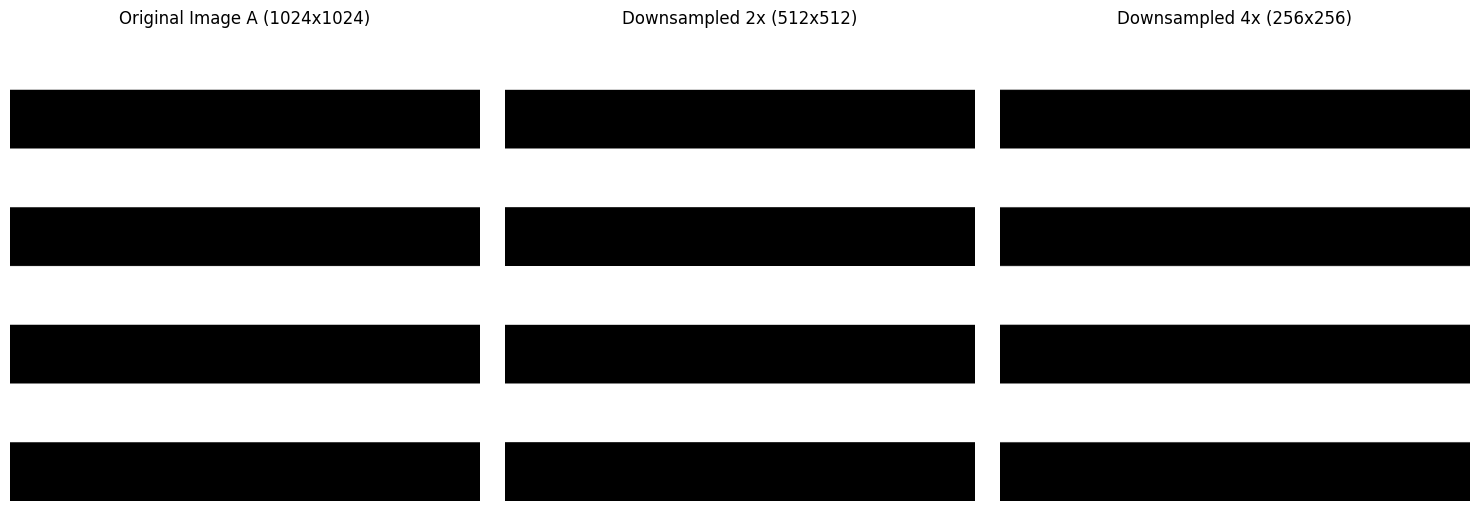

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# from skimage.transform import downscale_local_mean # Another option for downsampling

# Assuming image_a is available from previous execution

# Original image dimensions
original_height, original_width = image_a.shape

# --- Downsample by factor of 2 ---
# Simple downsampling by taking every Nth pixel (nearest neighbor type)
# This is prone to aliasing
image_a_downsampled_2x = image_a[::2, ::2]

# --- Downsample by factor of 4 ---
image_a_downsampled_4x = image_a[::4, ::4]

# --- Display Results ---
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(image_a, cmap='gray')
plt.title('Original Image A (1024x1024)')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_a_downsampled_2x, cmap='gray')
plt.title(f'Downsampled 2x ({image_a_downsampled_2x.shape[0]}x{image_a_downsampled_2x.shape[1]})')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_a_downsampled_4x, cmap='gray')
plt.title(f'Downsampled 4x ({image_a_downsampled_4x.shape[0]}x{image_a_downsampled_4x.shape[1]})')
plt.axis('off')

plt.tight_layout()
plt.show()

### Aliasing Effects and Nyquist Criterion

**Observation:**
When `Image A` (alternating horizontal lines) is downsampled by factors of 2 and 4 using simple nearest-neighbor sampling (taking every Nth pixel), distinct aliasing effects become visible:

*   **Downsampled 2x:** The horizontal lines are still somewhat recognizable, but they appear coarser. Since the original line size is 128 pixels, and we are skipping every other row, the lines effectively become 64 pixels thick, and the alternating pattern is maintained, but with a loss of detail.

*   **Downsampled 4x:** The image appears even more distorted. The sharp lines become more pixelated and might exhibit a 'stair-step' appearance or even disappear/merge, particularly if the downsampling rate approaches or exceeds the frequency of the lines.

**Relation to Nyquist Criterion:**

The Nyquist-Shannon sampling theorem states that to accurately reconstruct a signal (or image), the sampling rate must be at least twice the highest frequency present in the original signal. This minimum sampling rate is called the Nyquist rate, and half of it is the Nyquist frequency.

*   `Image A` contains very sharp transitions (edges) between black and white, which represent high-frequency components in the image's spatial domain. The 'frequency' of the lines can be thought of as how quickly the intensity changes.

*   When we downsample, we are effectively reducing the sampling rate. If this new, lower sampling rate is less than twice the highest frequency in the original image (or specifically, less than the frequency of the lines in this case), **aliasing occurs.**

*   **Aliasing** manifests as misrepresentation of high frequencies by lower frequencies. In our binary images with sharp lines, this means that the distinct line patterns can become blurred, jagged, or even produce entirely new, erroneous patterns (like moiré patterns) that were not present in the original.

*   For `Image A`, the periodic pattern of 128-pixel black and white lines means there's a dominant spatial frequency. When downsampling, we are essentially sampling this periodic signal at a lower rate. Without applying a low-pass filter (anti-aliasing filter) *before* downsampling, the high frequencies (sharp edges) fold back into lower frequencies, causing the distorted appearance. This is why the lines look less clean and more jagged or broken in the downsampled versions; the spatial information needed to define the sharp transitions is lost or incorrectly interpreted.

# Task
The 2D sinusoidal intensity images for sine and cosine variations have not yet been generated and displayed. I will execute the relevant code cell (`cell_id: 1feb10bc`) to create and show these images.